In [27]:
"""
    PROGRAM AUTHOR ->  THUMATI UJJIEVE ( CS16BTECH11039 )
    ** THE CODE IS NICELY COMMENTED. PLEASE LOOK AT THE COMMENTS 

    *** NOTE ***
    REPORT:

        The environment is learned using Q learning algorithm. Look at the Learner Class for more details. 
        The grid is assumed to be 3X3. The first move is randomly chosen.
        The inital values in the QSA table is chosen to be greater than 0.5. This is done so that the agent is optimistic
        
        There are 3 types of BOTs : Random bot, Safe Bot and Mix bot
        * Random bot chooses random moves
        * Safe bot chooses to move intelligently. Making attacking as well as defensive moves
        * Mix bot randomly chooses between random bot and safe bot.

        ** In the code user is represented as 1 , bot is represented as 2

        The testing (simulation after learning ) is always done with the Mix bot.


        OBSERVATION:

            It was found that the number of wins by the agent that learnt the environment with the MIX BOT (i.e bot which randomly chooses between safe and ranom move)
            had more number of wins in the range of than 70% to 75% on average.

            Second place was the agent that learnt the evironment with the RANDOM BOT (i.e that choses randomly)
            had number of wins in range 65% to 70% on average

            In Last place was the agent that learnt the environment with the SAFE BOT (i.e that chooses to act defensive or attacking based on the grid)
            had number of wins was greater than 60%.

            The draws in all the cases was in the range of 20 to 50.        

            THE GRAPHS ARE shown in the code itself

            In some cases the learning with the random bot had more wins than that with the mix bot but the difference in the number of
            wins was minimal

            ANS(5) The Q agent developed is not unbeatable since it's win rate is not 100% even against random bot. To improve the training 
                   human can play the game as bot in certain episodes so that the agent can learn human tricks also.    

"""


"\n    PROGRAM AUTHOR ->  THUMATI UJJIEVE ( CS16BTECH11039 )\n    ** THE CODE IS NICELY COMMENTED. PLEASE LOOK AT THE COMMENTS \n\n    *** NOTE ***\n    REPORT:\n\n        The environment is learned using Q learning algorithm. Look at the Learner Class for more details. \n        The grid is assumed to be 3X3. The first move is randomly chosen.\n        The inital values in the QSA table is chosen to be greater than 0.5. This is done so that the agent is optimistic\n        \n        There are 3 types of BOTs : Random bot, Safe Bot and Mix bot\n        * Random bot chooses random moves\n        * Safe bot chooses to move intelligently. Making attacking as well as defensive moves\n        * Mix bot randomly chooses between random bot and safe bot.\n\n        ** In the code user is represented as 1 , bot is represented as 2\n\n        The testing (simulation after learning ) is always done with the Mix bot.\n\n\n        OBSERVATION:\n\n            It was found that the number of wins by 

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [0]:
class Environment:
    """ 
        Environment Class that initates the tic tac toe environment. It has method to setup the environment, to print the environment
        and to make the bots take action. 
    
    """

    def __init__(self):
        self.grid = np.zeros(shape = (3,3), dtype = int)
        self.action_space = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2],[2,0],[2,1],[2,2]]

    ## Method to check if the move is a good move
    def isGoodMove(self,move):
        """
            Method to check if the move number is a good move 
        """
        if self.grid[self.action_space[move][0],self.action_space[move][1]] != 0:
            return False
        else:
            return True
    def xoro(self,num):
        if num == 1:
            return 'X'
        elif num == 2:
            return 'O'
        else:
            return ' '
    def Print(self):
        board = ''
        # there are 5 rows in a standard tic-tac-toe board
        for i in range(5):
            # switch between printing vertical and horizontal bars
            if i%2 == 0:
                row_num = i//2
                # print(row_num,self.xoro(self.grid[row_num,0]))
                board += "|  "+self.xoro(self.grid[row_num,0]) + "  |  " + self.xoro(self.grid[row_num,1]) + "  |  "+ self.xoro(self.grid[row_num,2]) + "  |    "
            else:
                board += " --- " * 3
            # don't forget to start a new line after each row using "\n"
            board += "\n"
        print(board)
        print("\n")
        
    ## Method used by the User to make a move 
    def act(self,inp):
        """
            Method that is used by the user to act given the input by the user. Returns the updated grid and wether the terminal state
            is reached or not
        """
        self.grid[self.action_space[inp][0],self.action_space[inp][1]] = 1
    
        return self.grid,self.checkTerminal() 
        
    def randomBotMove(self):
        """
            Method used by the random bot to make a move. It randomly selects the grid cell to mark given that the grid cell is 
            not already marked
        """
        ## getting the row and column numbers which are not marked
        rows,cols = np.where(self.grid == 0)
        if len(rows) == 0 :
            return -1
        num_picked = random.randint(0,len(rows) - 1)
        row_picked = rows[num_picked]
        col_picked = cols[num_picked]
        self.grid[row_picked,col_picked] = 2

    def check(self):
        """
            Method used by the SAFE BOT. Checks for attacking or defensive moves used by the safe bot 
            Also checks for winning/draw/losing condition by returning -2 if bot won , -1 if user won, -3 if draw happens, 4 if no attack or defensive move is found

        """
        pr,pc = -1,-1
        wincond = False

        ## Checking Rows
        for i in range(3):
            pos = -1            ## stores the col number where the cell could be marked
            for j in range(3):
                if self.grid[i,j] == 0:
                    pos = j
            ## counts the number of zeros , ones  and twos
            zeros = int(self.grid[i,0] == 0) + int(self.grid[i,1] == 0) + int(self.grid[i,2] == 0)
            ones = int(self.grid[i,0] == 1) + int(self.grid[i,1] == 1) + int(self.grid[i,2] == 1)
            twos = int(self.grid[i,0] == 2) + int(self.grid[i,1] == 2) + int(self.grid[i,2] == 2)
            # print(zeros,ones,twos,i)
            ## checks for condition of attacking or defensive move
            if ones >=2 or twos >=2:
                ## checking if there is position in the row to make a move
                if pos!=-1:
                    pr,pc = i,pos
                    ## if there is a chance for bot to win then return that cell position
                    if twos >=2:
                        return (pr,pc)
                ## checking if bot won 
                elif ones == 0:
                    return (-2,-2)
                ## checking if user won
                elif twos == 0:
                    return (-1,-1)

        ## Checking Columns
        for i in range(3):
            pos = -1
            for j in range(3):
                if self.grid[j,i] == 0:
                    pos = j
            zeros = int(self.grid[0,i] == 0) + int(self.grid[1,i] == 0) + int(self.grid[2,i] == 0)
            ones = int(self.grid[0,i] == 1) + int(self.grid[1,i] == 1) + int(self.grid[2,i] == 1)
            twos = int(self.grid[0,i] == 2) + int(self.grid[1,i] == 2) + int(self.grid[2,i] == 2)
            if ones >=2 or twos>=2:
                if pos!=-1:
                    pr,pc = pos,i
                    ## if winning move for bot is present then make that move
                    if twos >=2:
                        return (pr,pc)
                elif ones == 0:
                    return (-2,-2)
                elif twos == 0:
                    return (-1,-1)

        ## Checking Diagonals
        i = 0
        poszd1 = (-1,-1)       ## to store the position to mark the cell
        for j in range(3):
            if self.grid[j,i] == 0:
                poszd1 = (j,i)
                break
            i +=1
        i=2
        poszd2 = (-1,-1)
        for j in range(3):
            if self.grid[j,i] == 0:
                poszd2 = (j,i)
                break
            i -= 1
        zerosd1 = int(self.grid[0,0] == 0) + int(self.grid[1,1] == 0) + int(self.grid[2,2] == 0 )
        onesd1 = int(self.grid[0,0] == 1 )+ int(self.grid[1,1] == 1 )+ int(self.grid[2,2] == 1)
        twosd1 = int(self.grid[0,0] == 2 )+ int(self.grid[1,1] == 2 )+ int(self.grid[2,2] == 2)
        zerosd2 = int(self.grid[0,2] == 0 )+ int(self.grid[1,1] == 0) + int(self.grid[2,0] == 0)
        onesd2 = int(self.grid[0,2] == 1 )+ int(self.grid[1,1] == 1 )+ int(self.grid[2,0] == 1)
        twosd2 = int(self.grid[0,2] == 2 )+ int(self.grid[1,1] == 2) + int(self.grid[2,0] == 2)

        ## Check diagonal1 
        
        if onesd1 >=2 or twosd1 >=2:
            if zerosd1 > 0 :
                pr,pc = poszd1
                ## if winning move for bot is present then make that move
                if twosd1>=2:
                    return poszd1
            elif onesd1 == 0:
                return (-2,-2)
            elif twosd1 == 0:
                return (-1,-1)

        ### Check diagonal2
        if onesd2 >=2 or twosd2 >=2:
            if zerosd2 >0 :
                pr,pc = poszd2
                ## if winning move for bot is present then make that move
                if twosd2>=2:
                    return poszd2
            elif onesd2 == 0:
                return (-2,-2)
            elif twosd2 == 0:
                return (-1,-1)

        ## If position is found
        if pr !=-1:
            return (pr,pc)

        ## If no position is found and no winning condition is found then draw
        x,_ = np.where(self.grid == 0)
        if len(x) == 0:
            return (-3,-3)
          
        ## No attacking or defensive move is found
        return (4,4)
    
    def safeBotMove(self):
        """
            Method used by the safe bot while playing the game. Checks for an attacking or defensive move. if no such move then 
            Random move is performed.

        """
        r,c = self.check()
        ## if user/bot not won and there is attacking or defensive move present
        if r !=-1 and r!=4 and r!=-2:
            self.grid[r,c] = 2
        ## If no defensive and attacking move found then random move is performed
        if r == 4:
            self.randomBotMove()

    
    def checkTerminal(self):
        """
            Method to check for terminal condition , returns boolean, reward and status
        
        """
        r,_ = self.check()
        ## if bot won
        if r == -2:
            return True,-100,2
        ## if user won
        elif r == -1:
            return True, 100,1
        ## if draw
        elif r == -3:
            return True, -10,3
        ## if it is a non terminal state
        else:
            return False,0,0

    def actBot(self,moveType):
        """
            Method for the bot to make a move depending on the move Type 
        """
        if moveType == 'random':
            self.randomBotMove()
        elif moveType == 'safe':
            self.safeBotMove()
        ## Pick random bot to make a move
        else :
            if random.randint(0,1) == 0 :
                self.randomBotMove()
            else :
                self.safeBotMove()

    def getNextState(self,action,moveType,cond):
        """
            Method to get the next state of the game. This method makes the user moves according to the action number , then makes
            the bot move according to the 'moveType' wether it is safe bot or random bot. And then checks for terminal states.
            Finally returns the next state, reward and the boolean value that indicates wether terminal state is reached or not.

        """
        ## User Moves
        self.act(action)
        ret_val = self.checkTerminal()
        if cond == True:
            self.Print()
        ## Check if User Won
        if ret_val[0] == True:
            return self.grid,ret_val[0],ret_val[1],ret_val[2]

        ## If User did not win then bot will continue
        self.actBot(moveType)
        ## Check who won and wether it is terminal state or not
        if cond == True:
            self.Print()
        ret_val = self.checkTerminal()
        return self.grid,ret_val[0],ret_val[1],ret_val[2]

    def reset(self):
        """
            Method to reste the environment
        """
        self.grid = np.zeros(shape = (3,3),dtype = int)


In [0]:
class QSATable:
    """
        Class to define the structure of the QSA table. It has method to set and get the value form the table given the state and the 
        action

    """
    def __init__(self,init_state,actions,init_val):
        self.Q_sa = {}
        self.init_val = init_val
        for i in range(len(actions)):
            tp = (self.convert(init_state),i)
            self.Q_sa[tp] = init_val

    def getVal(self,state,action):
        """
            Method to get the value corresponding to the entry in the table given the state and action
        """
        if self.isPresent(state,action):

            return self.Q_sa[((self.convert(state)),action)]
        else:
            return self.init_val
    
    def convert(self,arr):
        """
            Method to conver the numpy array to string. this makes the array hashable
        """
        stri = ""
        for i in range(3):
            for j in range(3):
                stri = stri + str(arr[i,j])
        return stri
    def isPresent(self,state,action):
        """
            Method to check if the entry corresponding to the given state and action is present or not
        """
        if ((self.convert(state)),action) in self.Q_sa:
            return True
        else :
            return False

    def setVal(self,state,action,val):
        """
            Method to set the value in the table
        """
        self.Q_sa[((self.convert(state)),action)] = val


In [0]:
""" Learner Class """
class Learner:
    """
        Class for the Learner, it requires hyperparameters value and the environment.
    """
    def __init__(self,gamma,alpha,epsilon,env,init_val):
        self.gamma = gamma
        self.env = env
        self.alpha = alpha
        self.actions = self.env.action_space
        self.epsilon = epsilon
        self.Q_sa = QSATable(self.env.grid,self.actions,init_val)
    
    
    def Play_Match(self,learnType):
        """
            Method to simulate the game between user and bot using the greedy policy by choosing the action that maximizes 
            the value of Q given a particular state. The learnType parameter is used by the bot to decide wether to act as
            a safe bot or a random bot

        """
        self.env.reset()
        ## decide who makes the first move 
        first_move = random.randint(1,2)
        isterminal = False
        won = -1
        if first_move == 2:
            self.env.actBot(learnType)

        ## while terminal state is not reached play the game
        while not isterminal:
            
            maxi = 0
            action = []
            ## Loop to choose the action greedy policy is followed. The action that maximizes the value of Q
            for i in range(len(self.actions)):
                if self.env.grid[self.actions[i][0]][self.actions[i][1]] == 0:
                    if maxi <= self.Q_sa.getVal(self.env.grid,i):
                        if maxi == self.Q_sa.getVal(self.env.grid,i):
                            action.append(i)
                        else:
                            maxi = self.Q_sa.getVal(self.env.grid,i)
                            action = [i]
            if len(action) == 0:
                action = -1
            else:
                action = action[random.randint(0,len(action)-1)]
            _,isterminal,_,won = self.env.getNextState(action,learnType,False)
        ## After playing reset the environment
        self.env.reset()
        ## Return who won
        return won

    ## Method to get the action based on epsilon greedy policy
    def epsilon_greedy(self,state):
        """
            Method that returns the action number following the epsilon greedy policy. More the value of epsilon more the exploration
            The ties are broken randomly
        """
        ## if condition for choosing max is true
        if random.uniform(0,1) > self.epsilon:
            maxi = 0
            action_num = []

            for i in range(len(self.actions)):
                if not self.env.isGoodMove(i):
                    continue
                if maxi <= self.Q_sa.getVal(state,i):
                    ## for breaking ties
                    if maxi == self.Q_sa.getVal(state,i):
                        action_num.append(i)
                    else:
                        maxi = self.Q_sa.getVal(state,i)
                        action_num = [i]
#            print(len(action_num))
            if len(action_num) == 0:
                return -1
            if len(action_num) == 1:
                action_num = action_num[0]
            else:
                action_num = action_num[random.randint(0,len(action_num)-1)]
        else:
            action_num = random.randint(0,len(self.actions) - 1)
            while not self.env.isGoodMove(action_num):
                action_num = random.randint(0,len(self.actions) - 1)
            
            
        return action_num
    def plotProgress(self,winsList):
        """
            Method to plot the progress made between learning
        """
        eps_list = [x[0] for x in winsList]
        user_wins_list = [x[1] for x in winsList]
        bot_wins_list = [x[2] for x in winsList]
        draw_list = [x[3] for x in winsList]
        plt.plot(eps_list, user_wins_list, 'go-', label='User_wins', linewidth=2)
        plt.plot(eps_list, bot_wins_list, 'bo-', label='Bot_wins', linewidth=2)
        plt.plot(eps_list, draw_list, 'ro-', label='Draw', linewidth=2)
        plt.xlabel('NUMBER OF EPISODES')
        plt.ylabel('NUMBER OF WINS')
        plt.legend(loc = 2)
        plt.show()

    ## Method to learn the game using QLearning Algorithm
    def QLearner(self,learnType):
        """
            Method which implements the Qlearn algorithm based on the given environment. It runs for 10000 number of episodes and each
            episode lasting for max of 10 steps

        """
        max_steps = 10
        numEpisodes = 10000
        inLearningWinsList = []
        ## Loop through several episodes , In each episode the game is played until terminal state is reached
        for eps in range(numEpisodes):
            ''' uncomment the code if you want to see the progress per 200 episodes ''' 
            # ## To Test the algorithm at different Learning Phases and stores the number of User,bot wins and draws used for plotting puposes
            if eps % 200 == 0:
                bot_wins,user_wins,draws = 0,0,0            
                for i in range(100):
                    won = self.Play_Match(learnType)
                    if won == 1:
                        user_wins += 1
                    elif won == 2:
                        bot_wins +=1
                    else:
                        draws+=1
                inLearningWinsList.append([eps,user_wins,bot_wins,draws])
                #print("eps:",eps,"User_wins:",user_wins,"Bot_wins:",bot_wins,"Draw",draws)

            ## After each episode reset the environment
            self.env.reset()

            ## Decide who makes the first move
            first_move = random.randint(1,2)
            if first_move == 2:
                self.env.actBot(learnType)
            action = self.epsilon_greedy(self.env.grid)
            total_reward = 0

            ## Loop to go through several states until max_steps is reached or terminal state is reached
            for steps in range(max_steps):
                curr_state = np.array(self.env.grid)
                action = self.epsilon_greedy(curr_state)
                ## Get the next state, depending on the action (chosen using epsilon greedy policy) performed by the user 
                next_state,isterminal,reward,won = self.env.getNextState(action,learnType,False) 
                total_reward += reward
                ## Choose action_ for the next state by selecting the action that gives maximum Q value for the next_state
                maxi = 0
                action_ = -1
                for i in range(len(self.actions)):
                    if next_state[self.actions[i][0]][self.actions[i][1]] == 0 and maxi <= self.Q_sa.getVal(next_state,i):
                        maxi = self.Q_sa.getVal(next_state,i)
                        action_ = i
                ## If terminal state is reached
                if isterminal:
                    self.Q_sa.setVal(curr_state,action,self.Q_sa.getVal(curr_state,action) + (self.alpha * (reward - self.Q_sa.getVal(curr_state,action)) ))
                else:
                    self.Q_sa.setVal(curr_state,action,self.Q_sa.getVal(curr_state,action) + (self.alpha * (reward + ( self.gamma * self.Q_sa.getVal(next_state,action_)) - self.Q_sa.getVal(curr_state,action))))

                #action = action_
                if isterminal:
                    break
        self.plotProgress(inLearningWinsList)



In [0]:
''' To initiate the environment and learner class '''
env = Environment()
gamma = 0.999
alpha = 0.7
epsilon = 0.3
init_val = 0.7


# ANS to Question 1,2,3,4

Learning with random Bot


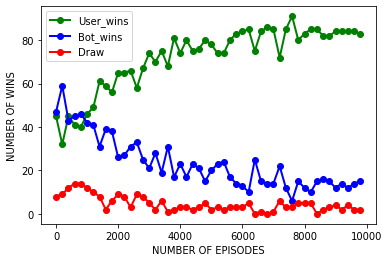

Learnt
Simulating 1000 plays with the mix bot for 10 times and taking avg
User_wins: 614 Bot_wins: 347 Draw: 38


In [25]:
RandBotlearner = Learner(gamma,alpha,epsilon,env,init_val)
print("Learning with random Bot")
RandBotlearner.QLearner('random')
print("Learnt")
''' To play after learning runs the simulation of 1000 plays for 10 times '''
print("Simulating 1000 plays with the mix bot for 10 times and taking avg")
user_wins,bot_wins,draw = 0,0,0
for j in range(10):
    for i in range(1000):
        won = RandBotlearner.Play_Match('mix')
        if won == 1:
            user_wins +=1
        elif won == 2:
            bot_wins +=1
        else:
            draw +=1
    
print("User_wins:",user_wins//10,"Bot_wins:",bot_wins//10,"Draw:",draw//10)


Learning with Safe bot


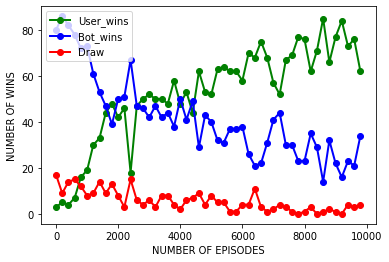

Learnt
Simulating 1000 plays with the mix bot for 10 times and taking avg
User_wins: 593 Bot_wins: 354 Draw: 52


In [28]:
SafeBotlearner = Learner(gamma,alpha,epsilon,env,init_val)
print("Learning with Safe bot")
SafeBotlearner.QLearner('safe')
print("Learnt")
''' To play after learning runs the simulation of 1000 plays for 10 times '''
print("Simulating 1000 plays with the mix bot for 10 times and taking avg")
user_wins,bot_wins,draw = 0,0,0
for j in range(10):
    for i in range(1000):
        won = SafeBotlearner.Play_Match('mix')
        if won == 1:
            user_wins +=1
        elif won == 2:
            bot_wins +=1
        else:
            draw +=1
    
print("User_wins:",user_wins//10,"Bot_wins:",bot_wins//10,"Draw:",draw//10)


learning with mix bot


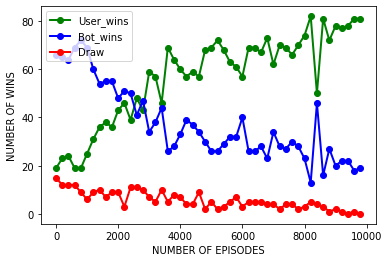

Learnt
Simulating 1000 plays with the mix bot for 10 times and taking avg
User_wins: 759 Bot_wins: 226 Draw: 14


In [29]:
MixBotlearner = Learner(gamma,alpha,epsilon,env,init_val)
print("learning with mix bot")
MixBotlearner.QLearner('mix')
print("Learnt")
''' To play after learning runs the simulation of 1000 plays for 10 times '''
print("Simulating 1000 plays with the mix bot for 10 times and taking avg")
user_wins,bot_wins,draw = 0,0,0
for j in range(10):
    for i in range(1000):
        won = MixBotlearner.Play_Match('mix')
        if won == 1:
            user_wins +=1
        elif won == 2:
            bot_wins +=1
        else:
            draw +=1
    
print("User_wins:",user_wins//10,"Bot_wins:",bot_wins//10,"Draw:",draw//10)


# one can see the agen that learnt to play against the mix bot is better having more win rates. This is due to exposure to both random play as well as attacking and defensive plays.

## For manual Testing, FIRST MOVE IS ALWAYS USER

### Have to enter cell number the cell, The cell number represented below
   |  0   |  1    |    2   |
   
   |  3   |   4    |    5   |

   |  6   |   7     |   8   |

In [39]:
evn = Environment()
while True:
    x,_ = env.check()
    if x==-2:
        print("Bot Won")
        break
    elif x == -1:
        print("User won")
        break
    elif x == 3:
        print ("Draw")
        break
    r = int(input("Enter cell number"))
    env.act(r)
    env.Print()
    env.safeBotMove()
    env.Print()

Enter cell number1
|     |  X  |     |    
 ---  ---  --- 
|     |     |     |    
 ---  ---  --- 
|     |     |     |    



|     |  X  |  O  |    
 ---  ---  --- 
|     |     |     |    
 ---  ---  --- 
|     |     |     |    



Enter cell number4
|     |  X  |  O  |    
 ---  ---  --- 
|     |  X  |     |    
 ---  ---  --- 
|     |     |     |    



|     |  X  |  O  |    
 ---  ---  --- 
|     |  X  |     |    
 ---  ---  --- 
|     |  O  |     |    



Enter cell number0
|  X  |  X  |  O  |    
 ---  ---  --- 
|     |  X  |     |    
 ---  ---  --- 
|     |  O  |     |    



|  X  |  X  |  O  |    
 ---  ---  --- 
|     |  X  |     |    
 ---  ---  --- 
|     |  O  |  O  |    



Enter cell number6
|  X  |  X  |  O  |    
 ---  ---  --- 
|     |  X  |     |    
 ---  ---  --- 
|  X  |  O  |  O  |    



|  X  |  X  |  O  |    
 ---  ---  --- 
|     |  X  |  O  |    
 ---  ---  --- 
|  X  |  O  |  O  |    



Bot Won
